In [1]:
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#indutâncias
l1=107e-6
l2=107e-6
#resistências
r1=0.52
r2=0.51
#capacitancias
c1=4.7e-6
c2=4.7e-6
w0 = 1/sqrt(l1*c1)
f0 = w0/(2*pi)
print("Frequencia de ressonância: {:.4f}".format(np.real(f0)))

Frequencia de ressonância: 7097.0737


In [3]:
def w(f):
    freq =2*pi*f
    return freq

In [4]:
def CalcularTransformador(v1, rc, f):
    m=k*sqrt(l1*l2)
    xl1=1j*w(f)*l1
    xl2=1j*w(f)*l2
    xm=1j*w(f)*m
    xc1=-1j/(w(f)*c1)
    xc2=-1j/(w(f)*c2)
    Z=np.array([[xc1+r1+xl1, -xm],[-xm, xl2+r2+(rc*xc2)/(rc+xc2)]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

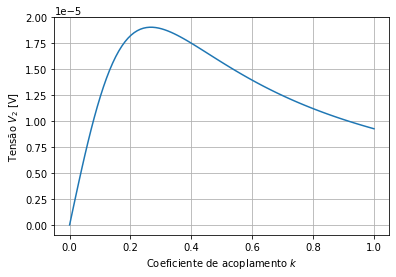

In [5]:
v1=10  #era50
rc=7  #era1e3
K=np.linspace(0,1,100)
V2=[]
for k in K:
    i1, i2 = CalcularTransformador(v1, rc, f0)
    V2.append(abs(((rc*c2)/(rc+c2))*i2))
plt.plot(K,V2)
plt.xlabel("Coeficiente de acoplamento $k$")
plt.ylabel("Tensão $V_2$ [V]")
plt.grid(True)
plt.show()

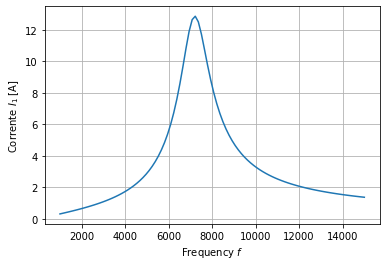

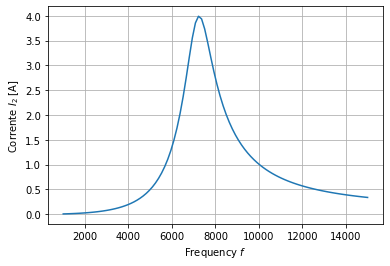

In [6]:
F=np.linspace(1e3,15e3,100)
I1=[]
I2=[]
k = 0.2
for freq in F:
    m=k*sqrt(l1*l2)
    xm=1j*w(freq)*m
    i1, i2 = CalcularTransformador(v1, rc, freq)
    I1.append(np.abs(i1))
    I2.append(np.abs(i2))

plt.plot(F,I1)    
plt.xlabel("Frequency $f$")
plt.ylabel("Corrente $I_1$ [A]")
plt.grid(True)
plt.show()

plt.plot(F,I2)
plt.xlabel("Frequency $f$")
plt.ylabel("Corrente $I_2$ [A]")
plt.grid(True)
plt.show()


In [7]:
i1, i2 = CalcularTransformador(v1, rc, f0)
S1 = (v1*np.conj(i1))/2
v2=i2*rc
S2 = (v2*np.conj(i2))/2

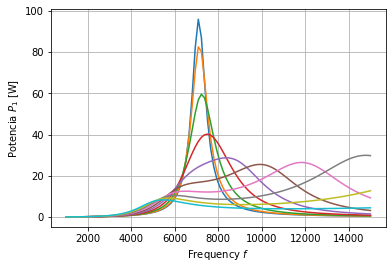

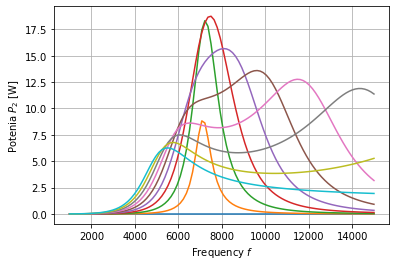

In [8]:
F=np.linspace(1e3,15e3,100)
K = np.linspace(0,1,10)
for k in K:
    P1=[]
    P2=[]
    for freq in F:
        i1, i2 = CalcularTransformador(v1, rc, freq)
        S1 = (v1*np.conj(i1))/2
        xc2 = (-1j/(w(freq)*c2))
        v2= (((rc*xc2)/(rc+xc2))*i2)
        S2 = (v2*np.conj(v2/rc))/2
        real_S1 = S1.real
        real_S2 = S2.real
        P1.append(real_S1)
        P2.append(real_S2)
    plt.plot(F,P1)

plt.xlabel("Frequency $f$")
plt.ylabel("Potencia $P_1$ [W]")
plt.grid(True)
plt.show()

for k in K:
    P1=[]
    P2=[]
    for freq in F:
        i1, i2 = CalcularTransformador(v1, rc, freq)
        S1 = (v1*np.conj(i1))/2
        xc2 = (-1j/(w(freq)*c2))
        v2= (((rc*xc2)/(rc+xc2))*i2)
        S2 = (v2*np.conj(v2/rc))/2
        real_S1 = S1.real
        real_S2 = S2.real
        P1.append(real_S1)
        P2.append(real_S2)
    plt.plot(F,P2)
plt.xlabel("Frequency $f$")
plt.ylabel("Potenia $P_2$ [W]")
plt.grid(True)
plt.show()

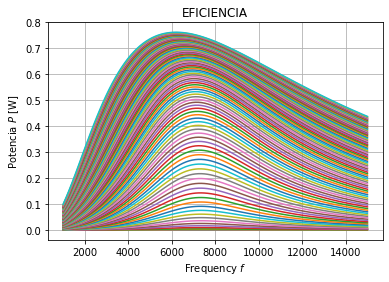

In [9]:
K = np.linspace(0,1,100)
for k in K:
    E = []
    P1=[]
    P2=[]
    for freq in F:
        i1, i2 = CalcularTransformador(v1, rc, freq)
        S1 = (v1*np.conj(i1))/2
        xc2 = (-1j/(w(freq)*c2))
        v2= (((rc*xc2)/(rc+xc2))*i2)
        S2 = (v2*np.conj(v2/rc))/2
        real_S1 = S1.real
        real_S2 = S2.real
        P1.append(real_S1)
        P2.append(real_S2)
    for i in range(0,len(F)):     
        E.append(P2[i]/P1[i])
    plt.plot(F,E)
        
plt.title('EFICIENCIA')
plt.xlabel("Frequency $f$")
plt.ylabel("Potencia $P$ [W]")
plt.grid(True)
plt.show()